# Reza Torabi - 610300032
# Machine Learning - HW1 : Q5

### Imports
We import the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA

### Reading Data

In [3]:
df = pd.read_csv("Datasets/Income.csv")

### Data Overview

In [4]:
df.head(10)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [6]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


### Exploratory Data Analysis

In [7]:
sns.set_palette('crest')
sns.set_style('ticks')

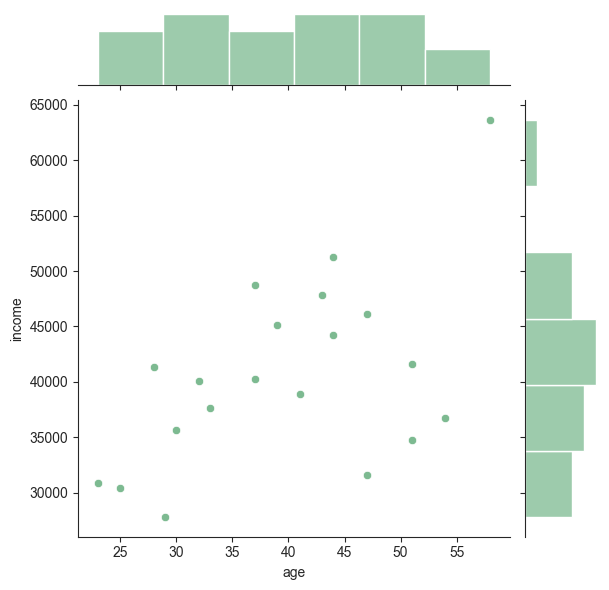

In [8]:
sns.jointplot(x = 'age', y = 'income', data = df)

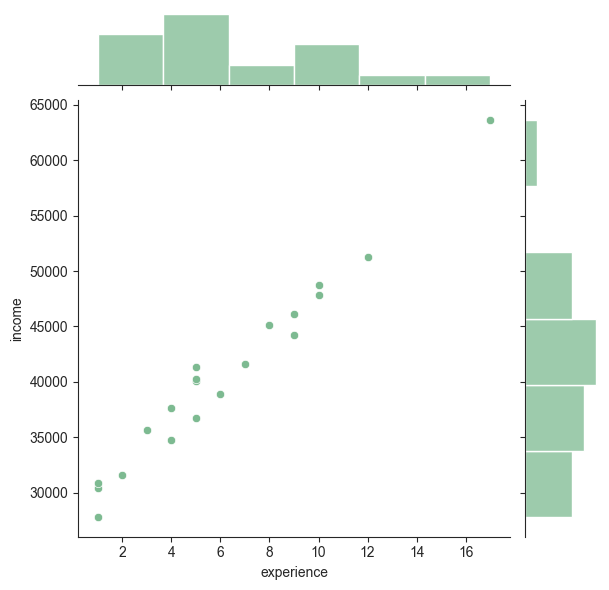

In [9]:
sns.jointplot(x = 'experience', y = 'income', data = df)

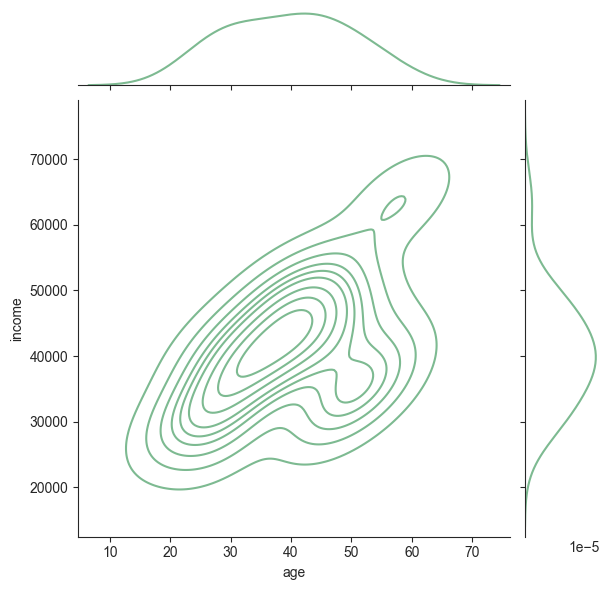

In [10]:
sns.jointplot(x = 'age', y = 'income', data = df, kind = 'kde')

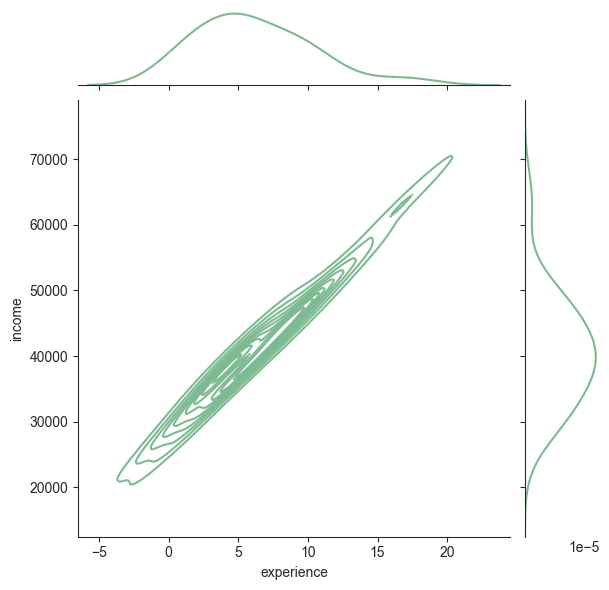

In [11]:
sns.jointplot(x = 'experience', y = 'income', data = df, kind = 'kde')

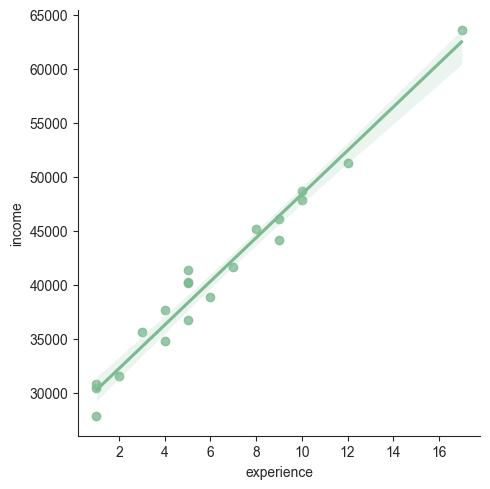

In [12]:
sns.lmplot(x = 'experience', y = 'income', data = df)

## 2. Preprocessing

Normalizing and standardizing are techniques used to rescale numerical features, often to improve the performance of machine learning algorithms.<br>

**Normalizing**<br>
- Purpose: To rescale the features to a fixed range, typically [0, 1] or [-1, 1].
- Method: Each feature value is transformed using the formula:
$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
- Use Cases: Useful when the algorithms do not assume any specific distribution of the data (e.g., k-nearest neighbors, neural networks).<br>

**Standardizing**
- Purpose: To rescale the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.
- Method: Each feature value is transformed using the formula:
$$X_{std} = \frac{X - \mu}{\sigma}$$
where X is the original value, 𝜇 is the mean of the feature, and σ is the standard deviation of the feature.
- Use Cases: Useful for algorithms that assume or perform better when the data is normally distributed (e.g., linear regression, logistic regression, support vector machines).<br>

**Difference Between Normalizing and Standardizing**<br>
- Range:
Normalizing scales the data to a fixed range, typically [0, 1] or [-1, 1].
Standardizing scales the data to have a mean of 0 and a standard deviation of 1.
- Effect:
Normalizing affects the scale of the data but retains the relative differences between data points.
Standardizing shifts and scales the data so that it resembles a standard normal distribution.<br>

Algorithms like Linear Regression and SVM often perform better when features are standardized because they assume data is normally distributed and require comparability across features so we standardize features for them.<br>

In [13]:
def standardize(df):
    df = df.astype(float)
    for i in range(3):
        col = np.array(df.iloc[:, i])
        mean = np.mean(col)
        std = np.std(col)
        std_col = (col - mean) / std
        df.iloc[:, i] = std_col
    return df

std_df = standardize(df)
std_df.describe()

,age,experience,income
count,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.387779e-16,-2.775558e-17,-2.220446e-17
std,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.703531e+00,-1.293548e+00,-1.567633e+00
25%,-8.338605e-01,-6.094603e-01,-6.422244e-01
50%,3.580996e-02,-2.985112e-01,-6.631334e-02
75%,7.520092e-01,6.965260e-01,5.658212e-01
max,1.877465e+00,2.686600e+00,2.779508e+00


## 3. Implementation

### 1. Gradient Descent

In [14]:
def h(w_array: np.array, x_array: np.array):
    return w_array @ x_array

def grad(h, w_array: np.array, x_matrix: np.array, y_array: np.array):
    gradient = np.zeros(3)
    for i in range(len(x_matrix)):
        gradient += (h(w_array, x_matrix[i]) - y_array[i]) * x_matrix[i]
    return gradient

def gradient_descent(h, grad, w_array: np.array, x_matrix: np.array, y_array: np.array, l_rate = 0.01, epsilon = 0.000001):
    iter = 0
    w_arrays = []
    while np.linalg.norm(grad(h, w_array, x_matrix, y_array)) > epsilon:
        iter = iter + 1
        w_arrays.append(w_array)
        w_array = w_array - l_rate * grad(h, w_array, x_matrix, y_array)
        print(f'iter_number = {iter}:')
        print(f'w = {w_array}:')
        print(f'norm of grad(x) = {np.linalg.norm(grad(h, w_array, x_matrix, y_array))}')
        print('_______________________________________________')
    return w_array, w_arrays

w_0 = np.zeros(3)
x_matrix = np.array(std_df.iloc[:, 0:2])
x_matrix = np.concatenate((np.ones((x_matrix.shape[0], 1)), x_matrix), axis=1)
y_array = np.array(std_df.iloc[:, 2])
w_optimized, w_arrays = gradient_descent(h, grad, w_0, x_matrix, y_array)
print(w_optimized)

iter_number = 1:
w = [-8.88178420e-18  1.06440867e-01  1.96845328e-01]:
norm of grad(x) = 15.671219687180043
_______________________________________________
iter_number = 2:
w = [-1.33226763e-17  1.67375082e-01  3.41225847e-01]:
norm of grad(x) = 11.236375868548249
_______________________________________________
iter_number = 3:
w = [-1.33226763e-17  1.98358879e-01  4.49233340e-01]:
norm of grad(x) = 8.339052365815895
_______________________________________________
iter_number = 4:
w = [-1.77635684e-17  2.09857426e-01  5.31827304e-01]:
norm of grad(x) = 6.4667639664418095
_______________________________________________
iter_number = 5:
w = [-1.77635684e-17  2.08894477e-01  5.96487773e-01]:
norm of grad(x) = 5.25759860734284
_______________________________________________
iter_number = 6:
w = [-2.05391260e-17  2.00168744e-01  6.48334624e-01]:
norm of grad(x) = 4.459894293674643
_______________________________________________
iter_number = 7:
w = [-1.77635684e-17  1.86809281e-01  6.90885

In [15]:
y_predicted_std = w_optimized @ x_matrix.T
y_actual = df.iloc[:, 2]
y_predicted = y_predicted_std * np.std(y_actual) + np.mean(y_actual)
for i in range(len(y_predicted)):
    print(f"sample number: {i + 1}")
    print(f"predicted income: {y_predicted[i]}")
    print(f"actual income: {y_actual[i]}")

sample number: 1
predicted income: 30944.21000844454
actual income: 30450
sample number: 2
predicted income: 34773.04162532407
actual income: 35670
sample number: 3
predicted income: 30924.317852968903
actual income: 31580
sample number: 4
predicted income: 38899.45908280596
actual income: 40130
sample number: 5
predicted income: 48620.33104530595
actual income: 47830
sample number: 6
predicted income: 41339.55677687442
actual income: 41630
sample number: 7
predicted income: 39296.24020360912
actual income: 41340
sample number: 8
predicted income: 36637.85979366343
actual income: 37650
sample number: 9
predicted income: 38403.48268180201
actual income: 40250
sample number: 10
predicted income: 44692.30414822564
actual income: 45150
sample number: 11
predicted income: 30547.428887641385
actual income: 27840
sample number: 12
predicted income: 46061.14591556105
actual income: 46110
sample number: 13
predicted income: 36717.16291838858
actual income: 36720
sample number: 14
predicted inco

### Evaluating the Model

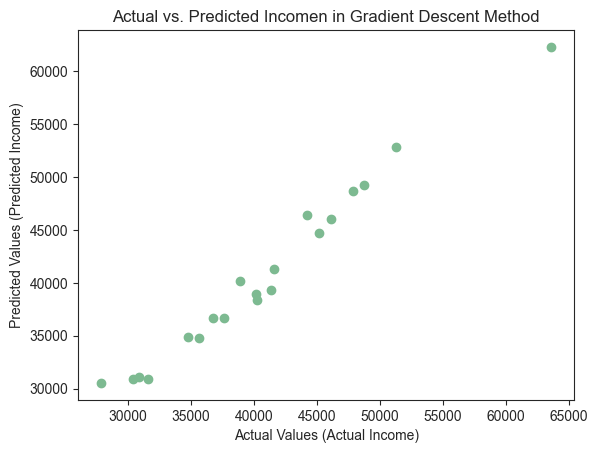

In [16]:
plt.scatter(y_actual, y_predicted)
plt.xlabel('Actual Values (Actual Income)')
plt.ylabel('Predicted Values (Predicted Income)')
plt.title('Actual vs. Predicted Incomen in Gradient Descent Method')
plt.show()

#### Calculate Error Metrics

In [17]:
print('Mean of original income:', df["income"].mean())
print('Mean of standardized income:', std_df["income"].mean())

Mean of original income: 40735.5
Mean of standardized income: -2.2204460492503132e-17


In [18]:
print('Std of original income:', df["income"].std())
print('Std of standardized income:', std_df["income"].std())

Std of original income: 8439.797624787483
Std of standardized income: 1.025978352085154


#### MSE

In [19]:
def MSE(predicted_values, actual_values):
    difference = actual_values - predicted_values
    mean_square_error = np.sum(difference ** 2) / len(predicted_values)
    return mean_square_error

print('MSE of original data:', MSE(y_predicted, y_actual))
print('MSE for standardized data:', MSE(y_predicted_std, y_array))

MSE of original data: 1533633.9787145942
MSE for standardized data: 0.02266386898192646


Showing the convergence in our gradient descent method

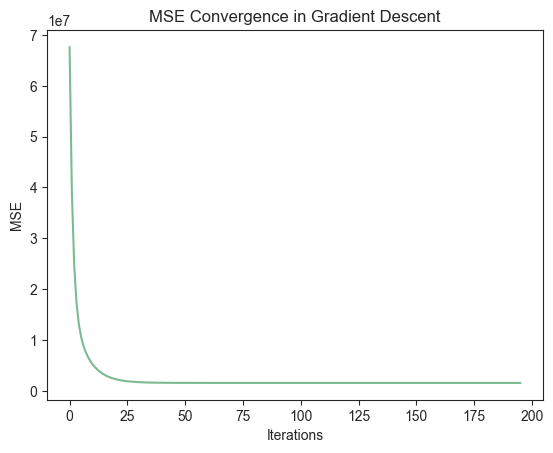

In [20]:
MSE_array = []
for i in range(len(w_arrays)):
    predict = (w_arrays[i] @ x_matrix.T) * np.std(y_actual) + np.mean(y_actual)
    MSE_array.append(MSE(predict, y_actual))

plt.plot(range(len(MSE_array)), MSE_array)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE Convergence in Gradient Descent')
plt.show()

#### Residuals

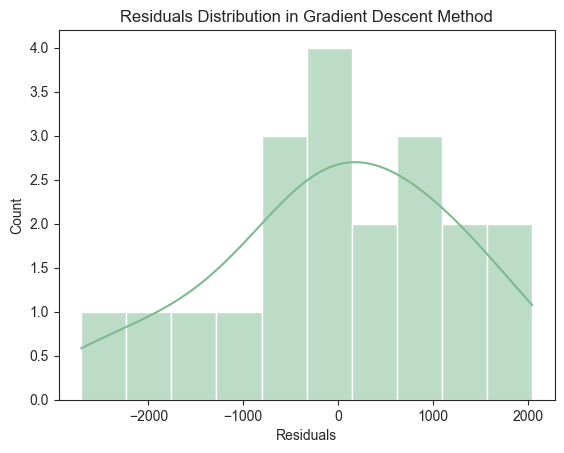

In [28]:
sns.histplot((y_actual - y_predicted), bins=10, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution in Gradient Descent Method')
plt.show()

### 2. Normal Equation

In [22]:
w_calculated = (np.linalg.inv(x_matrix.T @ x_matrix)) @ x_matrix.T @ y_actual
print(w_calculated)

[40735.5         -969.51725787  8692.75726857]


In [23]:
y_predicted_noraml = w_calculated @ x_matrix.T
for i in range(len(y_predicted_noraml)):
    print(f"sample number {i + 1}:")
    print(f"predicted income: {y_predicted_noraml[i]}")
    print(f"actual income: {y_actual[i]}")
    print('#####################################')

sample number 1:
predicted income: 30944.21015949905
actual income: 30450
#####################################
sample number 2:
predicted income: 34773.041766042006
actual income: 35670
#####################################
sample number 3:
predicted income: 30924.316531279976
actual income: 31580
#####################################
sample number 4:
predicted income: 38899.45943896813
actual income: 40130
#####################################
sample number 5:
predicted income: 48620.3314885171
actual income: 47830
#####################################
sample number 6:
predicted income: 41339.55606905633
actual income: 41630
#####################################
sample number 7:
predicted income: 39296.240860812344
actual income: 41340
#####################################
sample number 8:
predicted income: 36637.85989158296
actual income: 37650
#####################################
sample number 9:
predicted income: 38403.482661662856
actual income: 40250
###########################

### Evaluationg the Model

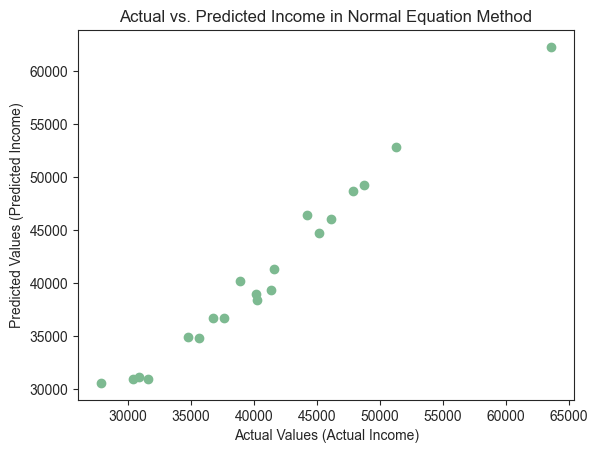

In [24]:
plt.scatter(y_actual, y_predicted_noraml)
plt.xlabel('Actual Values (Actual Income)')
plt.ylabel('Predicted Values (Predicted Income)')
plt.title('Actual vs. Predicted Income in Normal Equation Method')
plt.show()

#### MSE

In [25]:
print('MSE:', MSE(y_predicted_noraml, y_actual))

MSE: 1533633.978714178


#### Residuals

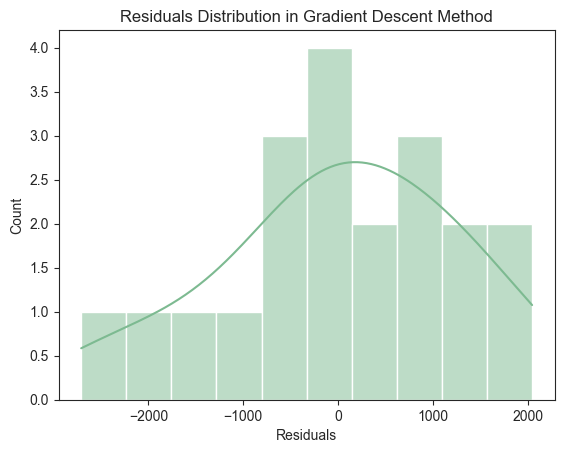

In [26]:
sns.histplot((y_actual - y_predicted_noraml), bins=10, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution in Gradient Descent Method')
plt.show()

We can see that the difference between the results of our models is very low and they both do very similar in this problem. 